<a href="https://colab.research.google.com/github/ameyas1/Blackpink_Face_Recognition/blob/master/blackpink_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.models import load_model
fc_model=load_model('cp/weights-184-0.94.hdf5')

W0622 03:16:36.077236 139762116528000 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0622 03:16:36.079507 139762116528000 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0622 03:16:36.081753 139762116528000 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtyp

In [2]:
fc_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_input (InputL [(None, 224, 224, 3)]     0         
_________________________________________________________________
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 114, 114, 64)      0     

In [0]:
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img,img_to_array
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

%matplotlib inline

# def preprocess_image(image_path,show=False):
#     img = load_img(image_path, target_size=(224, 224))
#     img = img_to_array(img)
#     img = np.expand_dims(img, axis=0)
#     img = preprocess_input(img)
#     if show:
#       img1=Image.fromarray(img,'RGB')
#       img.show()
#     return img

In [0]:
from urllib.request import urlopen
import os
import bz2
import matplotlib.patches as patches

from align import AlignDlib


def download_landmarks(dst_file):
    url = 'http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2'
    decompressor = bz2.BZ2Decompressor()

    with urlopen(url) as src, open(dst_file, 'wb') as dst:
        data = src.read(1024)
        while len(data) > 0:
            dst.write(decompressor.decompress(data))
            data = src.read(1024)


dst_dir = 'model1'
dst_file = os.path.join(dst_dir, 'landmarks.dat')

if not os.path.exists(dst_file):
    os.makedirs(dst_dir)
    download_landmarks(dst_file)

In [0]:
# Initialize the OpenFace face alignment utility
alignment = AlignDlib('model1/landmarks.dat')

In [0]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
#     b,g,r = cv2.split(img)     
#     img = cv2.merge([r,g,b])
#     return img
    return img[...,::-1]



In [0]:
# def convert_face(img_path,show=False,save=False,name=''):
#   img = load_image(img_path)
  
# #   img_aligned = alignment.align(224, img, bb, landmarkIndices=AlignDlib.OUTER_EYES_AND_NOSE)
#   bb = alignment.getAllFaceBoundingBoxes(img)
#   fig1, ax1 = plt.subplots(nrows=1, ncols=2,figsize=(15,15))
# #   fig1.figure(figsize=(20,10))
  
#   j=0
#   if show:
# #     plt.subplot(231)
#     ax1[0].imshow(img)
    

# # Show original image with bounding box
# #     plt.subplot(232)
#     ax1[1].imshow(img) 
  
#     fig2, ax2 = plt.subplots(nrows=1, ncols=4,figsize=(15,15))
#     for i in bb:
#       fig1.gca().add_patch(patches.Rectangle((i.left(), i.top()), i.width(), i.height(), fill=False, color='red'))
#       ax1[1].text(i.left() - 10, i.top() - 10,'Face', color='red',fontsize=12)
# #       plt.subplot(2,3,j)
# #       j=j+1
#       img_aligned = alignment.align(224, img, i, landmarkIndices=AlignDlib.OUTER_EYES_AND_NOSE)
#       ax2[j].imshow(img_aligned)
#       j=j+1
      
		  

# # Show aligned image
# #     plt.subplot(133)
# #     plt.imshow(img_aligned);
#   if save:
#     im_pil = Image.fromarray(img_aligned)

#     im_pil.save(name)
    
# #   return img_aligned

In [0]:
id_dict={0:'Jennie',1:'Jisoo',2:'Lisa',3:'Rose'}

In [0]:
def prediction(img_path):
  img = load_image(img_path)
  
#   img_aligned = alignment.align(224, img, bb, landmarkIndices=AlignDlib.OUTER_EYES_AND_NOSE)
  bb = alignment.getAllFaceBoundingBoxes(img)
  plt.figure(figsize=(15,15))
  plt.imshow(img)
  for i in bb:
    plt.gca().add_patch(patches.Rectangle((i.left(), i.top()), i.width(), i.height(), fill=False, color='red'))
    img_aligned = alignment.align(224, img, i, landmarkIndices=AlignDlib.OUTER_EYES_AND_NOSE)
    x=img_to_array(img_aligned)
    x = preprocess_input(x)
    x=np.expand_dims(x, axis=0)
    classes = fc_model.predict(x, batch_size=32)[0]
    id=np.argmax(classes)
    for j in id_dict:
      if j==id:
        identity=id_dict[id]
    plt.text(i.left() - 10, i.top() - 10,'{}'.format(identity), color='red',fontsize=17)
    

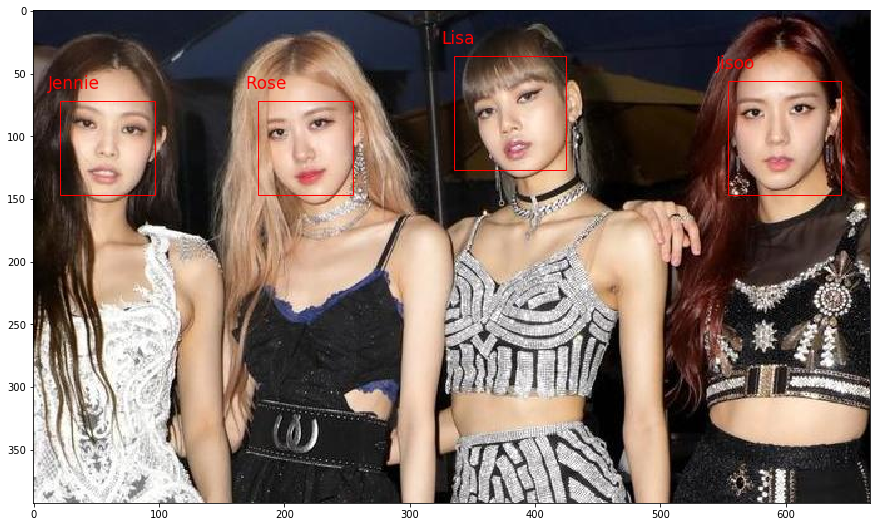

In [10]:
prediction('blackpink1.jpg')

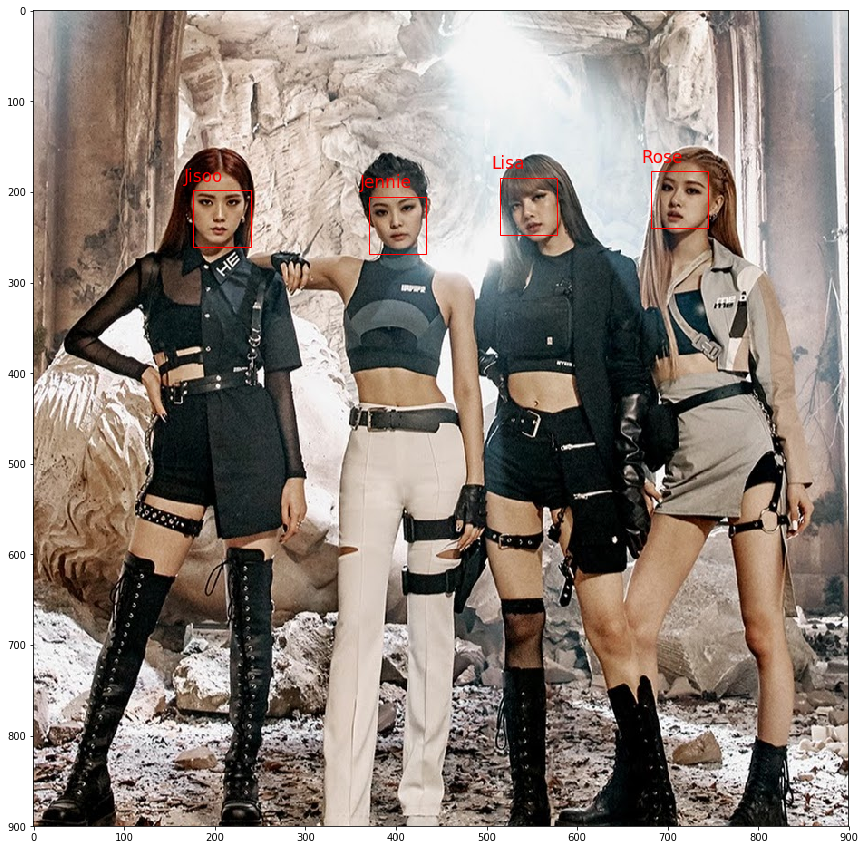

In [11]:
prediction('blackpink2.jpg')

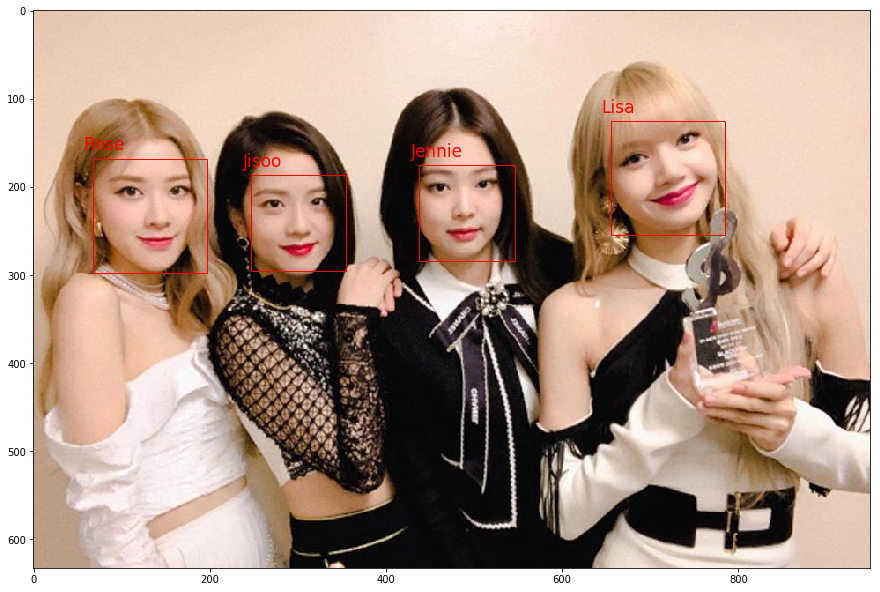

In [12]:
prediction('blackpink3.jpg')